In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import tweepy
from tweepy import OAuthHandler
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/Colab Notebooks/Tweets Backup'

In [ ]:
pd.set_option('display.max_colwidth', -1)

# load it into a pandas dataframe
#tweet_df = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'topic', 'id', 'username', 'name', 'tweet', 'like_count', 'reply_count', 'retweet_count', 'retweeted'])
#tweet_df.to_csv(root_path+ '/tweets (1).csv', index = False, header=True)
tweet_df =pd.read_csv(root_path+ '/tweetsCOVID19253.csv')
tweet_df['clean_tweets'] = "empty"
tweet_df.head(25)

<ipython-input-85-4a36d52b650e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty


In [ ]:
# Clean the data
import re
def clean_tweets(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [ ]:
from textblob import TextBlob
def analyze_tweets(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic)
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [ ]:
# Call function to get Clean tweets
tweet_df['clean_tweets'] = tweet_df['tweet'].apply(lambda x : clean_tweets(x))
tweet_df.head(15)

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive


In [ ]:
# call function to get the sentiments
tweet_df["Sentiment"] = tweet_df["clean_tweets"].apply(lambda x : analyze_tweets(x))
tweet_df.head(10)

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive


In [ ]:
# check summary of random record
n = 5
print("Original tweet:\n",tweet_df['tweet'][n])
print()
print("Clean tweet:\n",tweet_df['clean_tweets'][n])
print()
print("Sentiment of the tweet:\n",tweet_df['Sentiment'][n])

Original tweet:
 Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM

Clean tweet:
 next in line to the throne prince charles has tested positive for covid19 uk media file pic

Sentiment of the tweet:
 Positive


In [ ]:
# overall summary
print("Total Tweets Extracted for Topic : {} are : {}".format(tweet_df,len(tweet_df.tweet)))
print("Total Positive Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic :           tweet_dt    topic                   id        username  \
0       2020-03-25  Covid19  1242787309004689408  HousingLIN       
1       2020-03-25  Covid19  1242787309004689408  HousingLIN       
2       2020-03-25  Covid19  1242787309004689408  HousingLIN       
3       2020-03-25  Covid19  1242787309004689408  HousingLIN       
4       2020-03-25  Covid19  1242787307327012864  Rajki_           
...            ...      ...                  ...     ...           
127246  2020-03-25  Covid19  1242769191050137601  BennettInst      
127247  2020-03-25  Covid19  1242769190559322112  iHRSierraLeone   
127248  2020-03-25  Covid19  1242769190559322112  iHRSierraLeone   
127249  2020-03-25  Covid19  1242769190559322112  iHRSierraLeone   
127250  2020-03-25  Covid19  1242769190559322112  iHRSierraLeone   

                                       name  \
0       Jeremy Porteus                        
1       Jeremy Porteus                        
2      

In [ ]:
tweet_df["Sentiment"].value_counts()

Neutral     59735
Positive    49429
Negative    18087
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

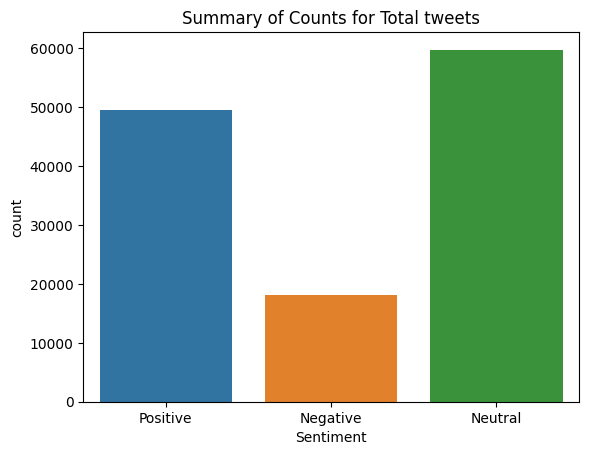

In [ ]:
sns.countplot(x="Sentiment", data=tweet_df)
plt.title("Summary of Counts for Total tweets")

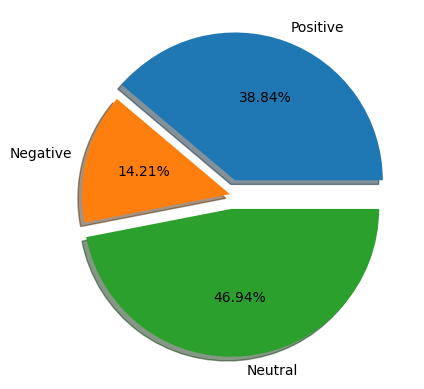

In [ ]:
a=len(tweet_df[tweet_df["Sentiment"]=="Positive"])
b=len(tweet_df[tweet_df["Sentiment"]=="Negative"])
c=len(tweet_df[tweet_df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

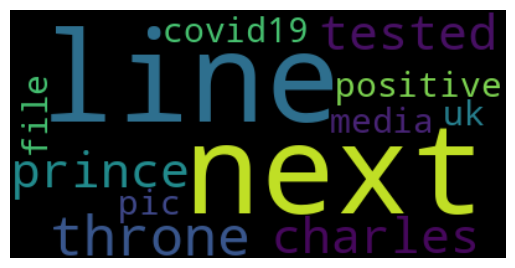

In [ ]:
# Start with one review:

text = tweet_df.clean_tweets[5]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
class Topic:
    def __init__(self, left: 'Tree', right: 'Tree'):
        self.left = left
        self.right = right

There are 12390876 words in the combination of all review.


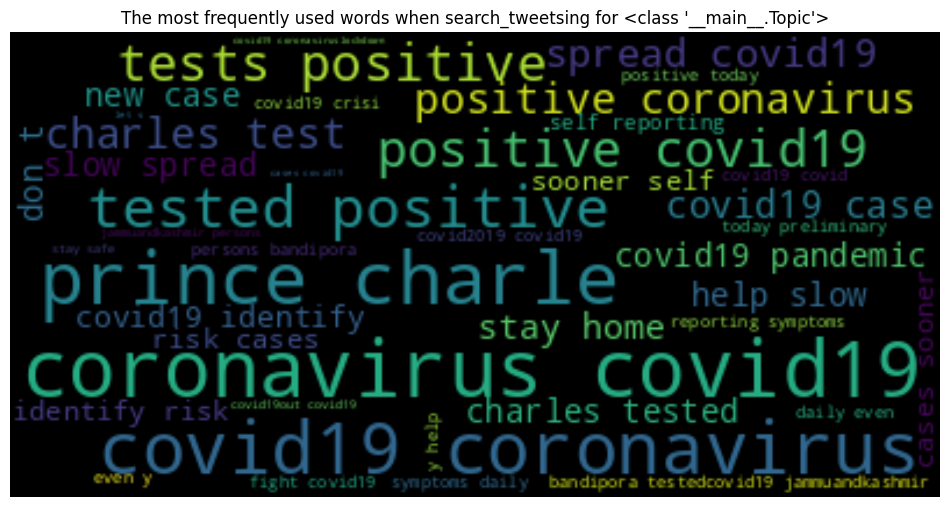

In [ ]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these tweets.

text = " ".join(review for review in tweet_df.clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when search_tweetsing for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 12390876 words in the combination of all review.


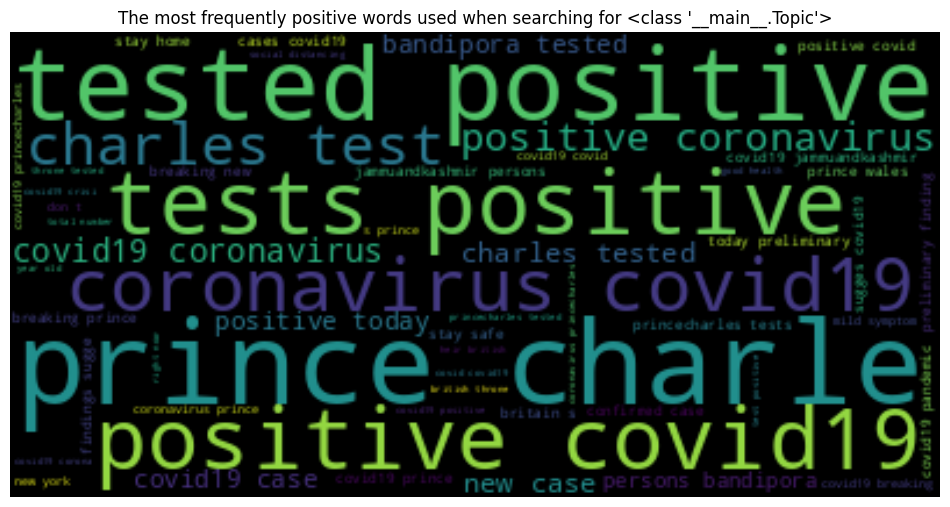

In [ ]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these tweets.

text_positive = " ".join(review for review in tweet_df[tweet_df["Sentiment"]=="Positive"].clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
text_new_positive = prepCloud(text_positive,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently positive words used when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 12390876 words in the combination of all review.


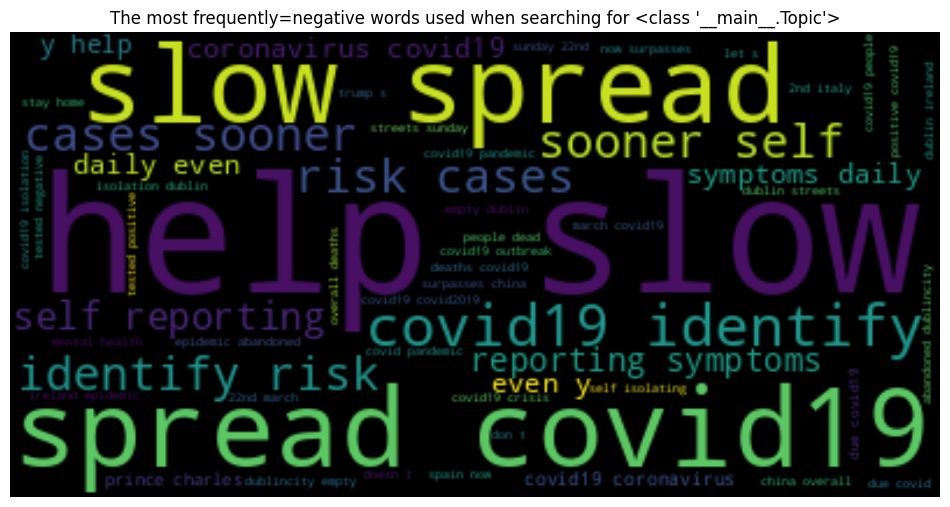

In [ ]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these df.

text_negative = " ".join(review for review in tweet_df[tweet_df["Sentiment"]=="Negative"].clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently=negative words used when searching for {}".format(Topic))
plt.axis("off")
plt.show()